https://public.tableau.com/app/profile/stanly.sukmajaya/viz/Hacktiv8-Milestone1/Dashboard1?publish=yes

### Milestone 1

### Nama: Stanly Sukmajaya

### Batch: RMT-036

### Program ini dibuat untuk menganalisa data pendapat yang diterima oleh game Mobile Legends oleh pemain-pemain ML di Indonesia, dan data didapat melalui Google Play Store. Terdapat data-data, seperti reviewId, thumbsUpCount dan content, yang dapat digunakan untuk menganalisa data dan memberikan insights.

### SMART breakdown

- Specific: Tingkatkan kepuasan pemain Mobile Legends di Indonesia dengan solving bugs and addressing complaints yang diterima dari users.
- Measurable: Kurangi rating 1 di playstore sebanyak 200 (dalam range waktu 3 bulan). Solve 25 bugs dan introduce/update 5 features yang telah di komplain users.
- Achievable: Dengan meningkatkan kualitas developers di Moonton atau hiring more professional developers, solving more bugs dan introducing/updating features bisa dilakukan.
- Relevant: Jika bugs-bugs dibiarkan terjadi, dan kekurangan-kekurangan dari game tidak di tindak-lanjuti, maka ada kemungkinan kepuasan pemain akan turun, jumlah pemain akan turun, yang mengakibatkan company profit juga menurun. Ini juga sangat penting bagi company (Moonton), karena jumlah pemain Mobile Legends terbanyak di dunia ada di Indonesia
- Time-bound: Dalam waktu 6 bulan, solve 25 bugs dan introduce/update 5 features.

Mengurangi rating 1 di playstore sebanyak 200 (dalam range waktu 3 bulan), solve 25 bugs dan introduce/update 5 features dalam waktu 6 bulan, mengurangi komplain pemain-pemain Mobile Legends dan meningkatkan kepuasan pemain untuk Mobile Legends, sehingga pemain-pemain Mobile Legends merasa di dengarkan dan akan meningkatkan game engagement Mobile Legends di Indonesia.

## Problem Statement: Mengetahui pendapat pemain-pemain Mobile Legends Indonesia terhadap game tersebut dalam kurun waktu 3 bulan (awal Agustus 2023 hingga akhir Oktober 2023).

- Berapa total thumbsUpCount di setiap rating (1 sampai 5)?
- Berapa total reviews di setiap rating?
- Di versi Mobile Legends manakah yang memiliki review paling banyak?
- Berapa rata-rata thumbsUpCount di setiap rating?
- Berapa jumlah review count di setiap bulan?
- Dalam setiap versi mobile legends, berapakah jumlah total thumbsUpCount di setiap rating nya? Berapa jumlah max thumbsUpCount di setiap rating tersebut, dan apa comment yang diberikan oleh user?

In [2]:
import pandas as pd
# https://www.kaggle.com/datasets/qoisalqorni/dataset-playstore-mobile-legend-indonesia
# https://global.dafunda.com/games/countries-with-the-most-ml-players/

mobile_legends = pd.read_csv("mobile_legends.csv")
mobile_legends["at"] = pd.to_datetime(mobile_legends["at"])
mobile_legends["month"] = mobile_legends["at"].dt.month_name()
mobile_legends["score"] = mobile_legends["score"].astype("category")
mobile_legends.to_csv("mobile_legends_processed.csv")

### Comparison of thumbs up count on each rating

/var/folders/qv/dgjs99p9327b4n569rm0j4000000gn/T/ipykernel_19093/1270067778.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mobile_legends.groupby("score")["thumbsUpCount"].sum().plot(kind="bar")


<Axes: xlabel='score'>

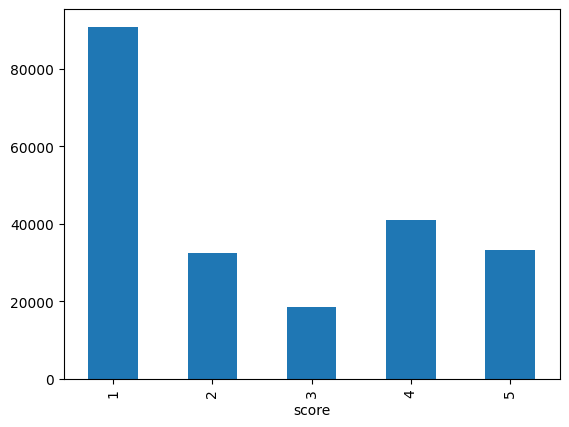

In [128]:
mobile_legends.groupby("score")["thumbsUpCount"].sum().plot(kind="bar")

Dari sini kita bisa melihat bahwa rating 1 memiliki nilai thumbs up count tertinggi, yaitu 90,886. Kita bisa mendapatkan insight bahwa kebanyakan dari pemain-pemain Mobile Legends Indonesia masih tidak puas dengan game yang ada sekarang, dan menginginkan perubahan atau update terhadap game.

### Total review counts on each rating

/var/folders/qv/dgjs99p9327b4n569rm0j4000000gn/T/ipykernel_19093/3242486414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mobile_legends.groupby("score")["reviewId"].count().sort_values().plot(kind="pie")


<Axes: ylabel='reviewId'>

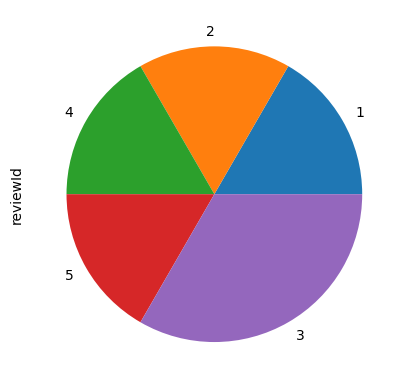

In [134]:
mobile_legends.groupby("score")["reviewId"].count().sort_values().plot(kind="pie")

Dari sini, kita bisa lihat bahwa dataset yang diterima sudah menyeimbangkan data berdasarkan rating. 200 baris untuk rating 1, 2, 4, 5 dan 400 baris untuk rating 3.

### Total reviews count on popular Mobile Legends versions

<Axes: ylabel='appVersion'>

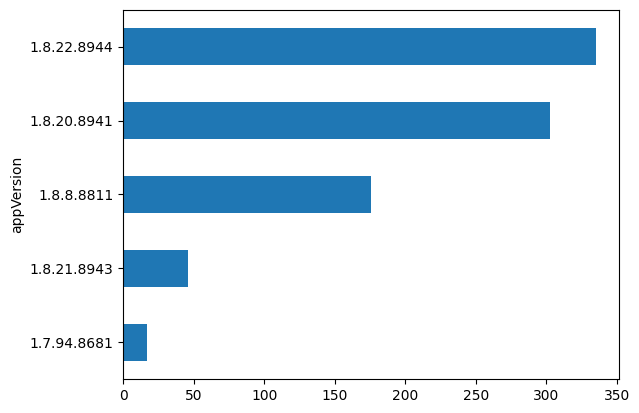

In [4]:
popular_versions = mobile_legends.groupby("appVersion")["reviewId"].count().sort_values(ascending=False).head(5)
mobile_legends[mobile_legends["appVersion"].isin(popular_versions.index)].groupby("appVersion")["reviewId"].count().sort_values().plot(kind="barh")

Dari sini kita bisa lihat bahwa user banyak yang comment tentang Mobile Legends pada versi 1.8.22.8944 dengan jumlah 335 data, sedangkan versi 1.7.94.8681 adalah paling sedikit, dengan jumlah 17. Hal ini mungkin bisa disebabkan karena versi 1.8.22.8944 dan 1.8.20.8941 adalah versi Mobile Legends paling ter-update pada kurun waktu awal Agustus 2023 hingga akhir Oktober 2023.

### Average thumbs up count on each latest Mobile Legends version

<Axes: xlabel='appVersion'>

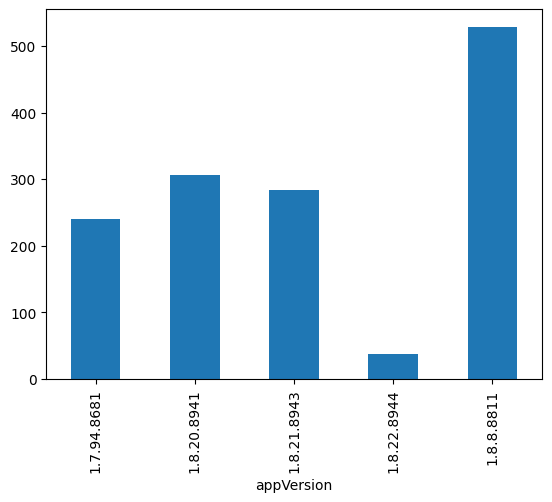

In [147]:
mobile_legends[mobile_legends["appVersion"].isin(popular_versions.index)].groupby("appVersion")["thumbsUpCount"].mean().plot(kind="bar")

Dari data di atas, bisa dilihat bahwa rata-rata thumbs up count terbanyak adalah di versi 1.8.8.8811. Hal ini bisa disebabkan karena versi tersebut adalah versi terbaru pada kurun waktu awal Agustus 2023 hingga akhir Oktober 2023, sehingga users banyak yang memiliki pendapat untuk versi Mobile Legends tersebut.

### App version and rating comparison (reviews count and thumbs up count)

In [5]:
df = mobile_legends.copy()
df = df[df['appVersion'].isin(popular_versions.index)]
grouped = df.groupby(['appVersion', 'score'])

result = grouped.agg(
    reviewCount=('reviewId', 'count'),
    totalThumbsUp=('thumbsUpCount', 'sum'),
    maxThumbsUpCount=('thumbsUpCount', 'max')
).reset_index()

max_thumbs_content = grouped.apply(lambda x: x.loc[x['thumbsUpCount'].idxmax(), 'content']).reset_index(name='maxThumbsUpContent')

result = pd.merge(result, max_thumbs_content, on=['appVersion', 'score'])
result.sort_values(["appVersion", "score"], ascending=False, inplace=True)
result.to_csv("app_versions.csv")
result.set_index(['appVersion', 'score'], inplace=True)
pd.set_option('display.max_colwidth', None)
result

/var/folders/qv/dgjs99p9327b4n569rm0j4000000gn/T/ipykernel_17495/3713284604.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['appVersion', 'score'])
/var/folders/qv/dgjs99p9327b4n569rm0j4000000gn/T/ipykernel_17495/3713284604.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_thumbs_content = grouped.apply(lambda x: x.loc[x['thumbsUpCount'].idxmax(), 'content']).reset_index(name='maxThumbsUpContent')


reviewCount  totalThumbsUp  maxThumbsUpCount  \
appVersion  score                                                 
1.8.8.8811  5               21          26155              9584   
            4               39          27376             19953   
            3               52           9720              7423   
            2               28           1577               861   
            1               36          28244              3767   
1.8.22.8944 5               70           3505              2676   
            4               51           1032               706   
            3              105           4728              3703   
            2               64           1009               486   
            1               45           2395              1969   
1.8.21.8943 5                4            723               716   
            4                7           8383              8278   
            3               21             14                 4   
            2                7           3058              3055   
            1                7            847               341   
1.8.20.8941 5               50           2126              1582   
            4               45           4086              3505   
            3              110           2149               604   
            2               41          25062             14552   
            1               57          59388             13833   
1.7.94.8681 5                2            674               674   
            4                5              2                 1   
            3                3           1567              1567   
            2                3           1846              1846   
            1                4              1                 1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    maxThumbsUpContent  
appVersion  score                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
1.8.8.8811  5                                                                                                                                                                                                                                                                    Untuk keseluruhan sudah bagus. tapi setelah update ada beberapa yang harus di perbaiki. 1. Terlalu banyak bug 2. Machtmaking tak sesuai 3. Perkara jaringan/sinyal yang suka lag/tiba2 hilang ketika saat war. Sekian Dari Saya Dan Terimakasih :⁠-⁠)  
            4                                                                                                                                                                                                      Tolong kembalikan performa Mobile Legends seperti dahulu. Saat sinyal tidak mudah jumping-jumping. Tolong sesuaikan tim sendiri dan tim lawan. "Tolong berikan kami lawan yang seimbang, tidak mudah namun tidak mempersulit..." Juga untuk data jangan terlalu besar. Handphone ram 3gb mengkis-mengkis (sesak) :d  
            3                                                                                                                

Dari sini kita bisa lihat insight-insight mengenai 5 versi Mobile Legends yang terbaru, dan yang paling banyak di berikan reviews dan thumbs up di kurun waktu awal Agustus 2023 hingga akhir Oktober 2023. Terdapat penjabaran versi Mobile Legends, beserta setiap ratingnya, dan juga nilai total jumlah review pada versi dan rating tersebut, total jumlah thumbs up, max thumbs up, dan apa comment user di review yang memiliki thumbs up terbanyak tersebut. Dari data ini bisa disimpulkan bahwa, walaupun lumayan banyak juga users yang meng-thumbs up comment dengan rating 5, namun commentsnya masih terdapat kata-kata "tapi", dan di lanjutkan dengan nasihat-nasihat untuk meningkatkan performa game Mobile Legends.

Count of reviews based on month

<Axes: xlabel='month'>

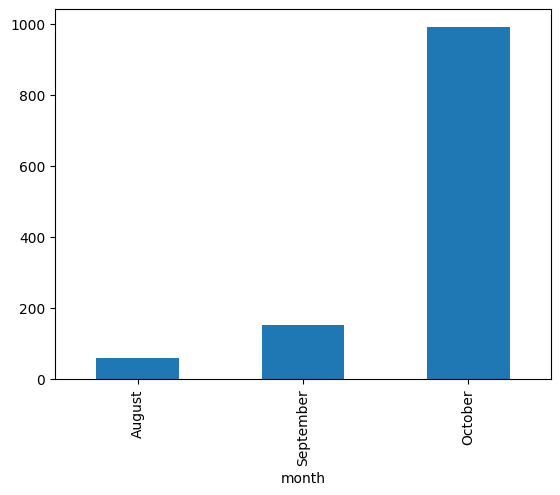

In [153]:
mobile_legends.groupby("month")["reviewId"].count().sort_values().plot(kind="bar")

Dari sini kita bisa lihat bahwa reviews dari user yang terbanyak dari bulan Agustus, September dan Oktober, adalah bulan Oktober. Hal ini bisa disebabkan karena pada bulan tersebut bugs-bugs atau features yang terdapat di game Mobile Legends mengganggu atau tidak sesuai dengan ekspektasi gamers di Indonesia.

## Practical Statistics: Descriptive

r-correlation: -0.06


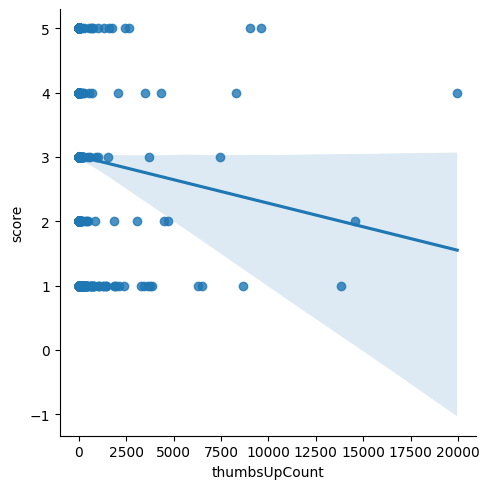

In [84]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

print(f"r-correlation: {mobile_legends['score'].corr(mobile_legends['thumbsUpCount']):.2f}")
sns.lmplot(data=mobile_legends,x='thumbsUpCount', y='score')

Dari data di atas, bisa dilihat bahwa walaupun rating 4 dan 5 juga banyak jumlahnya, namun plot menunjukkan bahwa lebih banyak yang mengarah ke rating negatif, yaitu 1 dan 2.

## Practical Statistics: Inferential

In [58]:
import numpy as np

std = mobile_legends['thumbsUpCount'].std()
N = len(mobile_legends)
low, up = stats.norm.interval(0.95,loc=mobile_legends['thumbsUpCount'].mean(),scale=std/np.sqrt(N))

print('Lower Limit:',low)
print('Upper Limit:',up)

Lower Limit: 117.81120346744581
Upper Limit: 242.63212986588752


Karena jumlah pemain Mobile Legends di Indonesia ada sangat banyak, dan sepertinya pemain Mobile Legends bermain game nya cukup konsisten, seharusnya rating 5 untuk game Mobile Legends di play store lebih banyak dari pada rating 1.

#### H0: Jumlah total thumbs up count pada rating 1 <= rating 5
#### H1: Jumlah total thumbs up count pada rating 1 > rating 5

In [74]:
rating_5 = mobile_legends[mobile_legends['score'] == 5]
rating_1 = mobile_legends[mobile_legends['score'] == 1]

t_stat, p_val = stats.ttest_ind(rating_5['thumbsUpCount'],rating_1['thumbsUpCount'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: -2.3395149055986044
P-value: 0.0198025273196248


Karena p-value < critical value (0.05), maka H0 di tolak, dan kita menerima H1, yaitu jumlah total thumbs up count pada rating 1 lebih banyak dari pada rating 5.

In [82]:
mobile_legends["thumbsUpCount"].sum()

216266

## Kesimpulan

Kesimpulan yang bisa diberikan dari analisis-analisis di atas adalah, Mobile Legends merupakan mobile game MOBA yang terkenal di Indonesia. Dalam kurun waktu 3 bulan, sudah ada 216266 total thumbs up count, yang berarti banyak orang sangat antusias untuk memberikan opini kepada game tersebut. Namun, walaupun dengan banyak nya rating 4 dan 5, rating terbanyak yang diberikan oleh user adalah rating 1. Sehingga bisa disimpulkan bahwa, walaupun game ini terkenal dan secara konsisten sering dimainkan warga Indonesia, masih banyak orang yang kurang puas dengan fitur-fitur dan mekanik bermain Mobile Legends, sehingga banyak orang yang komplain. Masih banyak hal yang perlu diperhatikan dan di improve oleh Moonton untuk membuat gamers Mobile Legends Indonesia puas dengan game tersebut. Terlebih, hal ini sangat penting untuk di address, karena Indonesia merupakan negara di dunia yang pemain Mobile Legends nya terbanyak.